In [1]:
!pip install pyspark
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=b1cd7a561dc376f9212bafa73034082bd287e4f8b0eae26888282ceb21523270
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/publi

In [2]:
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import stddev,countDistinct,count,avg,col
from pyspark.sql.functions import when
from pyspark.sql.functions import mean

from pyspark.sql.types import IntegerType
from sklearn.impute import SimpleImputer

In [3]:
data_as_csv = pd.read_csv('processed_data_with_group.csv')

In [4]:
print(data_as_csv.head())

   Grup  Numar Data_deces/externare  Stare  Varsta     Sex  \
0     1      1       5/4/2012 19:28  alive      72  Female   
1     1      2       8/28/2012 2:39  alive      75    Male   
2     1      3      11/22/2011 9:03  alive      83    Male   
3     1      4       6/20/2012 6:15  alive      43    Male   
4     1      5       7/23/2011 2:41  alive      75    Male   

   Indice_de_masa_corporala  Data_internarii Hipertensiv Fibrilatie_atriala  \
0                 37.588179  4/26/2012 22:48          nu                 nu   
1                 30.188278   8/25/2012 7:29          nu                 nu   
2                 26.572634  10/30/2011 7:37          nu                 nu   
3                 83.264629  5/28/2012 15:25          nu                 nu   
4                 31.824842   7/3/2011 20:25          da                 nu   

   ... Sodiu_din_sange Calciu_din_sange     Clorura Interval_anionic  \
0  ...      138.750000         7.463636  109.166667        13.166667   
1  ...  

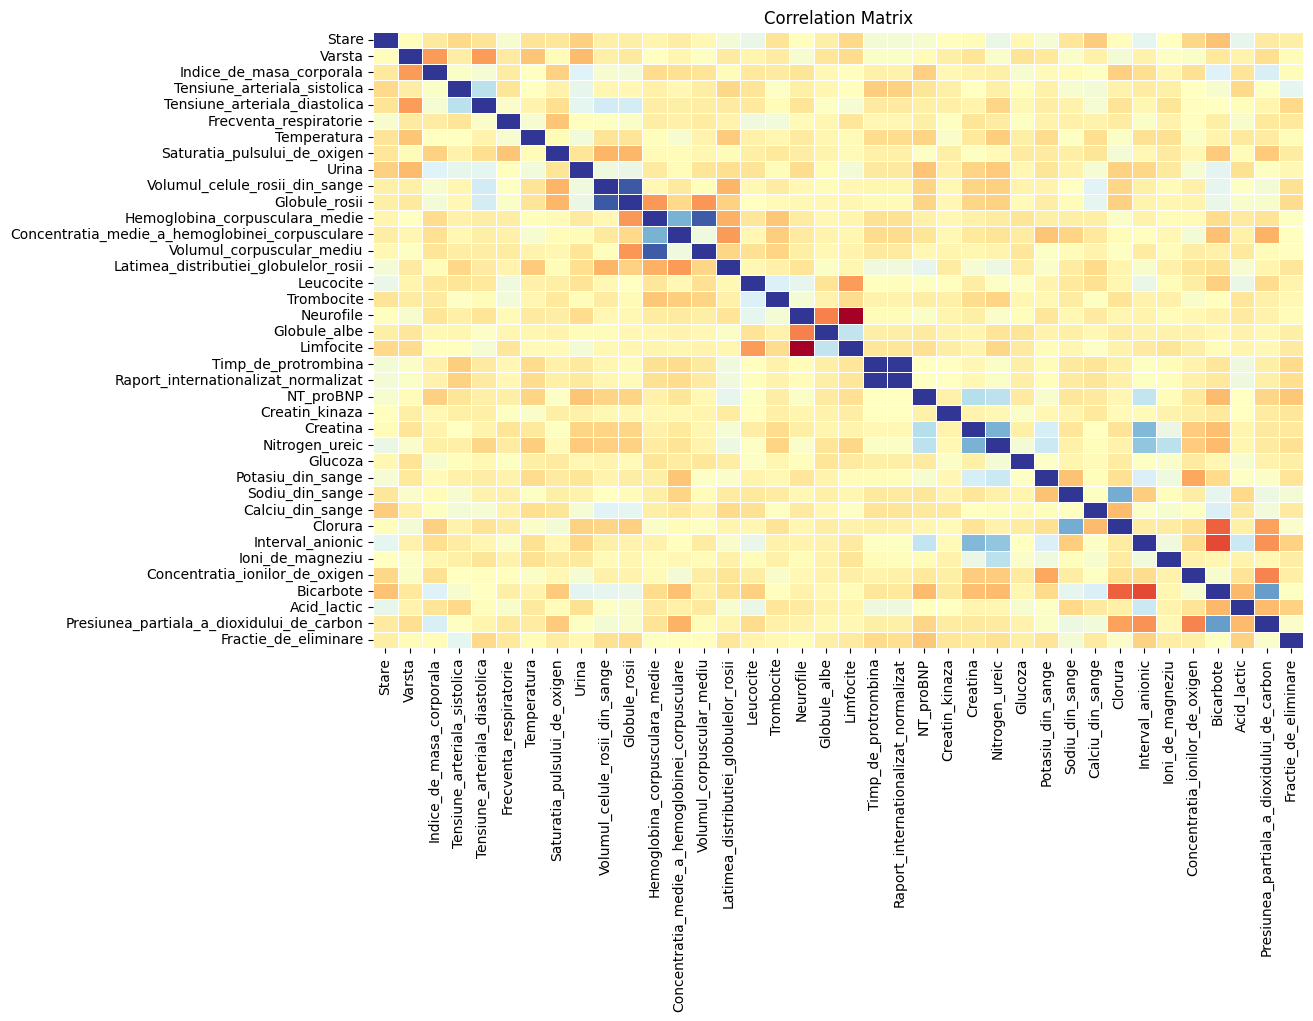

                                                                                               Correlation
Hemoglobina_corpusculara_medie                 Clorura                                            0.095372
Varsta                                         Concentratia_ionilor_de_oxigen                     0.095204
Neurofile                                      NT_proBNP                                          0.095157
Nitrogen_ureic                                 Leucocite                                          0.093275
Interval_anionic                               Calciu_din_sange                                   0.092790
Potasiu_din_sange                              Acid_lactic                                        0.092384
Volumul_corpuscular_mediu                      Potasiu_din_sange                                  0.091808
Glucoza                                        Leucocite                                          0.091175
NT_proBNP                            

In [11]:
from sklearn.impute import SimpleImputer

dataframe = data_as_csv

# ----------------Target Column-------------------------------------------------
dataframe['Stare'] = dataframe['Stare'].replace({'alive': 0, 'dead': 1})
# --------------------Categorical Columns---------------------------------------
dataframe['Hipertensiv'] = dataframe['Hipertensiv'].replace({'nu': 0,'da': 1})
dataframe['Fibrilatie_atriala'] = dataframe['Fibrilatie_atriala'].replace({'nu': 0,'da': 1})
dataframe['Boala_coronariana'] = dataframe['Boala_coronariana'].replace({'nu': 0,'da': 1})
dataframe['Diabet'] = dataframe['Diabet'].replace({'nu': 0,'da': 1})
dataframe['Anemii_deficitare'] = dataframe['Anemii_deficitare'].replace({'nu': 0,'da': 1})
dataframe['Depresie'] = dataframe['Depresie'].replace({'nu': 0,'da': 1})
dataframe['Hiperlipemie'] = dataframe['Hiperlipemie'].replace({'nu': 0,'da': 1})
dataframe['Insuficienta_renala'] = dataframe['Insuficienta_renala'].replace({'nu': 0,'da': 1})
dataframe['Boala_pulmonara_obstructiva_cronica'] = dataframe['Boala_pulmonara_obstructiva_cronica'].replace({'nu': 0,'da': 1})
# ------------------------------------------------------------------------------

label_x = dataframe.drop(columns='Stare')
label_y = dataframe[['Stare']]

simpleImp = SimpleImputer(missing_values=np.nan, strategy='mean')
column = label_x.select_dtypes(include='float64').columns

simpleImp.fit(label_x[column])
label_x[column] = simpleImp.transform(label_x[column])

SimpleImp =  SimpleImputer(missing_values=np.nan, strategy="most_frequent")
SimpleImp.fit(label_y)

label_y = SimpleImp.transform(label_y)
label_y = pd.DataFrame(label_y, columns=['Stare'], dtype='int64')

df = label_x.copy()
df['Stare'] = label_y
df.groupby(by=('Grup')).describe().round().T
col = ['Stare','Varsta','Indice_de_masa_corporala','Tensiune_arteriala_sistolica','Tensiune_arteriala_diastolica','Frecventa_respiratorie','Temperatura','Saturatia_pulsului_de_oxigen','Urina','Volumul_celule_rosii_din_sange','Globule_rosii','Hemoglobina_corpusculara_medie','Concentratia_medie_a_hemoglobinei_corpusculare','Volumul_corpuscular_mediu','Latimea_distributiei_globulelor_rosii','Leucocite','Trombocite','Neurofile','Globule_albe','Limfocite','Timp_de_protrombina','Raport_internationalizat_normalizat','NT_proBNP','Creatin_kinaza','Creatina','Nitrogen_ureic','Glucoza','Potasiu_din_sange','Sodiu_din_sange','Calciu_din_sange','Clorura','Interval_anionic','Ioni_de_magneziu','Concentratia_ionilor_de_oxigen','Bicarbote','Acid_lactic','Presiunea_partiala_a_dioxidului_de_carbon','Fractie_de_eliminare']
corr = df[col].corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='RdYlBu', linewidths=0.5, cbar=False);
# Create the heatmap
plt.tick_params(axis='both', labelsize=10)
# Add a title
plt.title("Correlation Matrix", fontsize=12)
# Display the heatmap
plt.show()

corr_df = pd.DataFrame(corr.unstack().sort_values(ascending=False), columns=['Correlation'])
corr_df = corr_df.drop_duplicates().dropna()
corr_df = corr_df[corr_df['Correlation'] <  0.095372  ]

top_pairs = corr_df.nlargest(60, 'Correlation')
print(top_pairs)

In [12]:
import pandas as pd
from scipy import stats

# Încărcăm dataframe-ul tău
df = data_as_csv
df = df[['Stare','Varsta','Indice_de_masa_corporala','Tensiune_arteriala_sistolica','Tensiune_arteriala_diastolica','Frecventa_respiratorie','Temperatura','Saturatia_pulsului_de_oxigen','Urina','Volumul_celule_rosii_din_sange','Globule_rosii','Hemoglobina_corpusculara_medie','Concentratia_medie_a_hemoglobinei_corpusculare','Volumul_corpuscular_mediu','Latimea_distributiei_globulelor_rosii','Leucocite','Trombocite','Neurofile','Globule_albe','Limfocite','Timp_de_protrombina','Raport_internationalizat_normalizat','NT_proBNP','Creatin_kinaza','Creatina','Nitrogen_ureic','Glucoza','Potasiu_din_sange','Sodiu_din_sange','Calciu_din_sange','Clorura','Interval_anionic','Ioni_de_magneziu','Concentratia_ionilor_de_oxigen','Bicarbote','Acid_lactic','Presiunea_partiala_a_dioxidului_de_carbon','Fractie_de_eliminare']]

# Definim coloana categorică target și coloanele numerice
target_column = 'Stare'
numeric_columns = ['Varsta','Indice_de_masa_corporala','Tensiune_arteriala_sistolica','Tensiune_arteriala_diastolica','Frecventa_respiratorie','Temperatura','Saturatia_pulsului_de_oxigen','Urina','Volumul_celule_rosii_din_sange','Globule_rosii','Hemoglobina_corpusculara_medie','Concentratia_medie_a_hemoglobinei_corpusculare','Volumul_corpuscular_mediu','Latimea_distributiei_globulelor_rosii','Leucocite','Trombocite','Neurofile','Globule_albe','Limfocite','Timp_de_protrombina','Raport_internationalizat_normalizat','NT_proBNP','Creatin_kinaza','Creatina','Nitrogen_ureic','Glucoza','Potasiu_din_sange','Sodiu_din_sange','Calciu_din_sange','Clorura','Interval_anionic','Ioni_de_magneziu','Concentratia_ionilor_de_oxigen','Bicarbote','Acid_lactic','Presiunea_partiala_a_dioxidului_de_carbon','Fractie_de_eliminare']

# Calculăm testul ANOVA pentru fiecare coloană numerică
anova_results = {}
for column in numeric_columns:
    groups = []
    for category in df[target_column].unique():
        groups.append(df[df[target_column] == category][column])
    
    f_value, p_value = stats.f_oneway(*groups)
    anova_results[column] = {'F-value': f_value, 'p-value': p_value}

# Afișăm rezultatele testului ANOVA pentru fiecare coloană numerică
for column, result in anova_results.items():
    print(f"Coloana: {column}")
    print(f"F-value: {result['F-value']}")
    print(f"p-value: {result['p-value']}")
    print('-' * 20)

Coloana: Varsta
F-value: 34.39296966888299
p-value: 4.6773931695714985e-09
--------------------
Coloana: Indice_de_masa_corporala
F-value: 23.249906830572694
p-value: 1.4480893599172871e-06
--------------------
Coloana: Tensiune_arteriala_sistolica
F-value: 146.77712456087227
p-value: 1.6910476300472306e-33
--------------------
Coloana: Tensiune_arteriala_diastolica
F-value: 62.888298902128334
p-value: 2.474777102604758e-15
--------------------
Coloana: Frecventa_respiratorie
F-value: 113.45403982881892
p-value: 2.545527662248985e-26
--------------------
Coloana: Temperatura
F-value: 71.02875823781623
p-value: 4.117578615224611e-17
--------------------
Coloana: Saturatia_pulsului_de_oxigen
F-value: 41.63050427001425
p-value: 1.1648962750276834e-10
--------------------
Coloana: Urina
F-value: 248.92977971851278
p-value: 2.8548295901866646e-55
--------------------
Coloana: Volumul_celule_rosii_din_sange
F-value: 2.2501532626638054
p-value: 0.13363952860016465
--------------------
Coloana

In [15]:
# Sortăm rezultatele testului ANOVA în funcție de p-value
sorted_results = sorted(anova_results.items(), key=lambda x: x[1]['p-value'])

# Afișăm primele cele mai semnificative coloane numerice
num_top_features = 20  # Numărul de coloane numerice cele mai semnificative pe care să le afișăm
for i in range(num_top_features):
    column = sorted_results[i][0]
    p_value = sorted_results[i][1]['p-value']
    f_value = sorted_results[i][1]['F-value']
    print(f"Coloana: {column}")
    print(f"p-value: {p_value}")
    print(f"F-value: {f_value}")
    print('-' * 20)

Coloana: Interval_anionic
p-value: 5.396468833006082e-99
F-value: 458.3177212253437
--------------------
Coloana: Bicarbote
p-value: 5.383164134220443e-93
F-value: 429.26713907058104
--------------------
Coloana: Acid_lactic
p-value: 2.1907418078533625e-87
F-value: 402.19410574945965
--------------------
Coloana: Leucocite
p-value: 2.350659844817736e-81
F-value: 373.18839928084486
--------------------
Coloana: Nitrogen_ureic
p-value: 2.579110907329995e-77
F-value: 353.8134475614077
--------------------
Coloana: Calciu_din_sange
p-value: 1.2168128881530548e-63
F-value: 288.58869195804107
--------------------
Coloana: Urina
p-value: 2.8548295901866646e-55
F-value: 248.92977971851278
--------------------
Coloana: Latimea_distributiei_globulelor_rosii
p-value: 1.390045566441089e-41
F-value: 184.53371167807705
--------------------
Coloana: Raport_internationalizat_normalizat
p-value: 2.5419679822580135e-39
F-value: 173.94770758741078
--------------------
Coloana: Concentratia_ionilor_de_oxi

In [18]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier

# Încărcăm dataframe-ul tău
df = data_as_csv
df = df[['Stare','Varsta','Indice_de_masa_corporala','Tensiune_arteriala_sistolica','Tensiune_arteriala_diastolica','Frecventa_respiratorie','Temperatura','Saturatia_pulsului_de_oxigen','Urina','Volumul_celule_rosii_din_sange','Globule_rosii','Hemoglobina_corpusculara_medie','Concentratia_medie_a_hemoglobinei_corpusculare','Volumul_corpuscular_mediu','Latimea_distributiei_globulelor_rosii','Leucocite','Trombocite','Neurofile','Globule_albe','Limfocite','Timp_de_protrombina','Raport_internationalizat_normalizat','NT_proBNP','Creatin_kinaza','Creatina','Nitrogen_ureic','Glucoza','Potasiu_din_sange','Sodiu_din_sange','Calciu_din_sange','Clorura','Interval_anionic','Ioni_de_magneziu','Concentratia_ionilor_de_oxigen','Bicarbote','Acid_lactic','Presiunea_partiala_a_dioxidului_de_carbon','Fractie_de_eliminare']]

# Definim coloana categorică target și coloanele numerice
target_column = 'Stare'
numeric_columns = ['Varsta','Indice_de_masa_corporala','Tensiune_arteriala_sistolica','Tensiune_arteriala_diastolica','Frecventa_respiratorie','Temperatura','Saturatia_pulsului_de_oxigen','Urina','Volumul_celule_rosii_din_sange','Globule_rosii','Hemoglobina_corpusculara_medie','Concentratia_medie_a_hemoglobinei_corpusculare','Volumul_corpuscular_mediu','Latimea_distributiei_globulelor_rosii','Leucocite','Trombocite','Neurofile','Globule_albe','Limfocite','Timp_de_protrombina','Raport_internationalizat_normalizat','NT_proBNP','Creatin_kinaza','Creatina','Nitrogen_ureic','Glucoza','Potasiu_din_sange','Sodiu_din_sange','Calciu_din_sange','Clorura','Interval_anionic','Ioni_de_magneziu','Concentratia_ionilor_de_oxigen','Bicarbote','Acid_lactic','Presiunea_partiala_a_dioxidului_de_carbon','Fractie_de_eliminare']

# Separăm caracteristicile și targetul
X = df[numeric_columns]
y = df[target_column]

# Inițializăm un clasificator de tip Decision Tree
clf = DecisionTreeClassifier()

# Antrenăm clasificatorul
clf.fit(X, y)

# Obținem importanța caracteristicilor
feature_importances = clf.feature_importances_

# Creăm o listă de tupluri (caracteristică, importanță)
importance_list = list(zip(numeric_columns, feature_importances))

# Sortăm lista în funcție de importanță
sorted_importance = sorted(importance_list, key=lambda x: x[1], reverse=True)

# Afișăm primele cele mai semnificative coloane numerice
num_top_features = 20  # Numărul de coloane numerice cele mai semnificative pe care să le afișăm
for i in range(num_top_features):
    feature = sorted_importance[i][0]
    importance = sorted_importance[i][1]
    print(f"Caracteristica: {feature}")
    print(f"Importanță: {importance}")
    print('-' * 20)

Caracteristica: Interval_anionic
Importanță: 0.08702044355934788
--------------------
Caracteristica: Bicarbote
Importanță: 0.060298076486161034
--------------------
Caracteristica: Potasiu_din_sange
Importanță: 0.05681864980687387
--------------------
Caracteristica: Limfocite
Importanță: 0.04824208388204526
--------------------
Caracteristica: Clorura
Importanță: 0.04440013447558367
--------------------
Caracteristica: Presiunea_partiala_a_dioxidului_de_carbon
Importanță: 0.04338506658441876
--------------------
Caracteristica: Temperatura
Importanță: 0.04324021149173735
--------------------
Caracteristica: Concentratia_ionilor_de_oxigen
Importanță: 0.04316811482433234
--------------------
Caracteristica: Creatina
Importanță: 0.04015145560111197
--------------------
Caracteristica: Calciu_din_sange
Importanță: 0.039077654147490704
--------------------
Caracteristica: Acid_lactic
Importanță: 0.03826251750351758
--------------------
Caracteristica: Glucoza
Importanță: 0.033217656776253

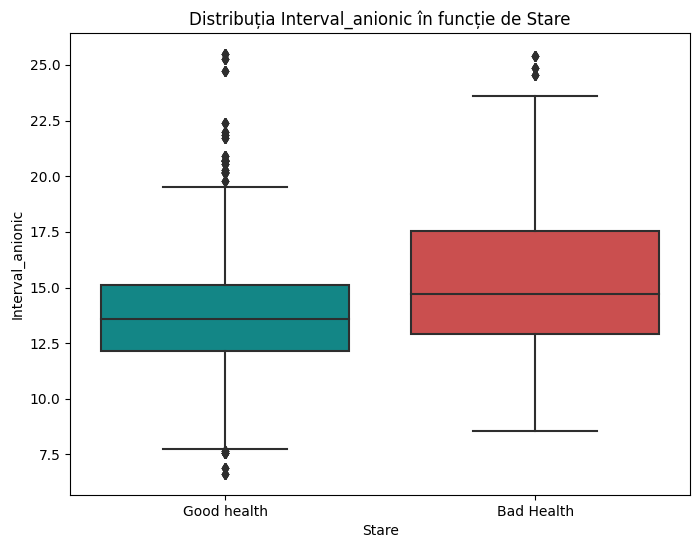

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Interval_anionic'

# Creează un box plot utilizând coloana numerică și coloana categorică target
plt.figure(figsize=(8, 6))
box_colors = ['#009999', '#de3a3a']

sns.boxplot(x=target_column, y=numeric_column, data=df,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(numeric_column)

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

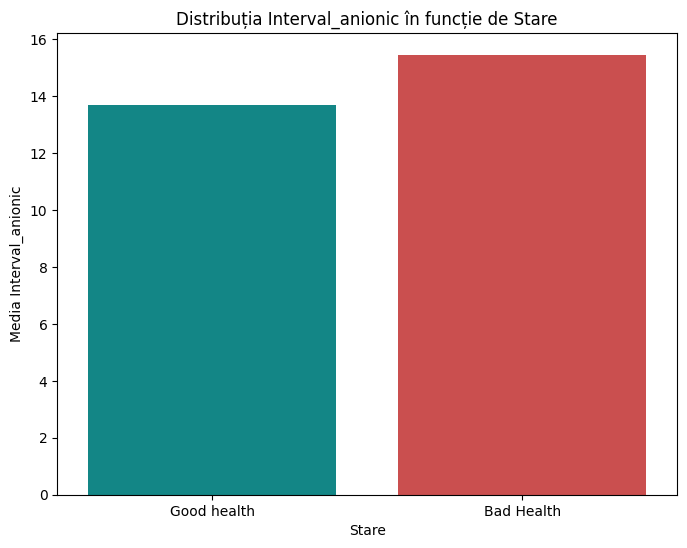

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Interval_anionic'
box_colors = ['#009999', '#de3a3a']
# Calculează media coloanei numerice în funcție de categoriile target
grouped_data = df.groupby(target_column)[numeric_column].mean().reset_index()

# Creează un grafic de bare utilizând datele grupate
plt.figure(figsize=(8, 6))
sns.barplot(x=target_column, y=numeric_column, data=grouped_data,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(f'Media {numeric_column}')

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

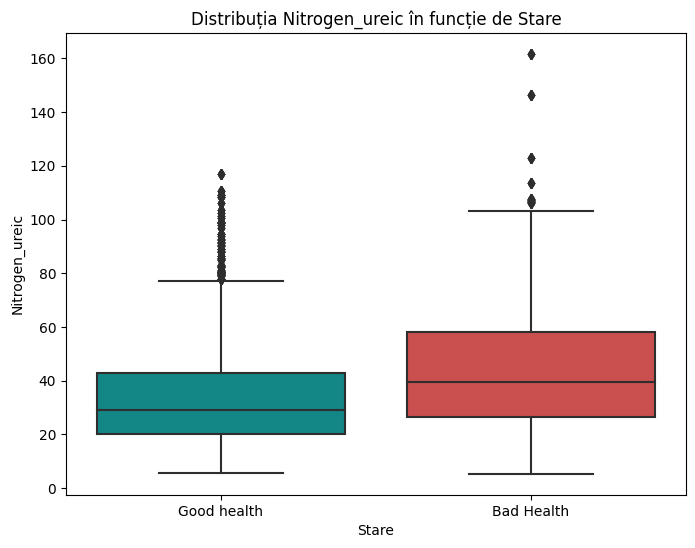

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Nitrogen_ureic'

# Creează un box plot utilizând coloana numerică și coloana categorică target
plt.figure(figsize=(8, 6))
box_colors = ['#009999', '#de3a3a']

sns.boxplot(x=target_column, y=numeric_column, data=df,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(numeric_column)

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

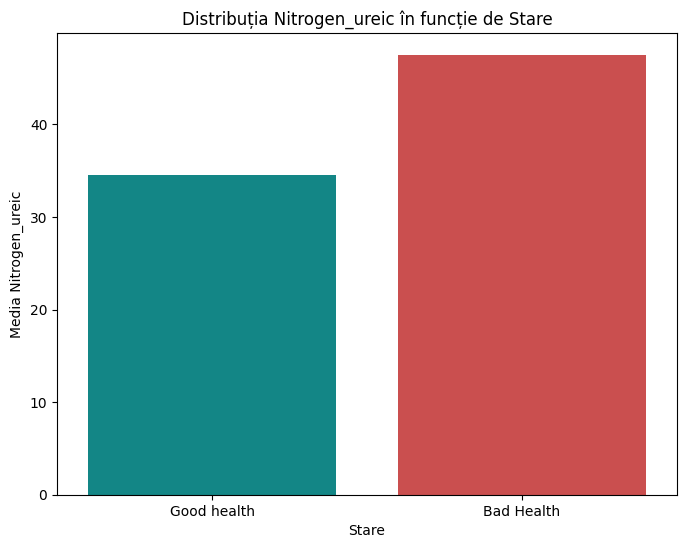

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Nitrogen_ureic'
box_colors = ['#009999', '#de3a3a']
# Calculează media coloanei numerice în funcție de categoriile target
grouped_data = df.groupby(target_column)[numeric_column].mean().reset_index()

# Creează un grafic de bare utilizând datele grupate
plt.figure(figsize=(8, 6))
sns.barplot(x=target_column, y=numeric_column, data=grouped_data,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(f'Media {numeric_column}')

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

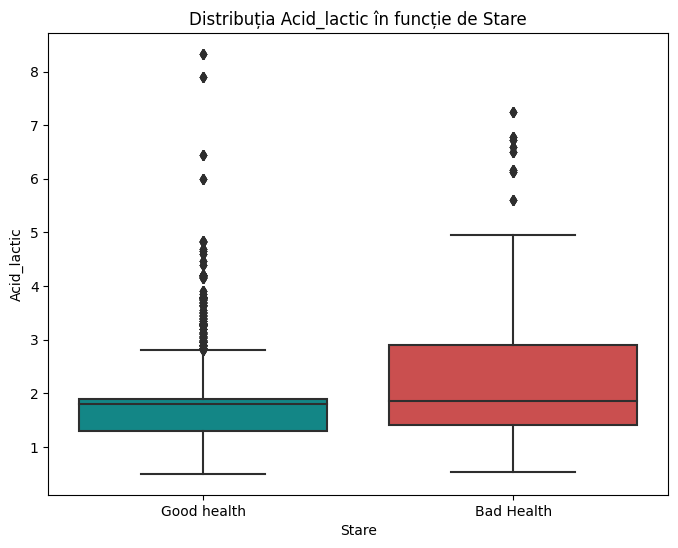

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Acid_lactic'

# Creează un box plot utilizând coloana numerică și coloana categorică target
plt.figure(figsize=(8, 6))
box_colors = ['#009999', '#de3a3a']

sns.boxplot(x=target_column, y=numeric_column, data=df,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(numeric_column)

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

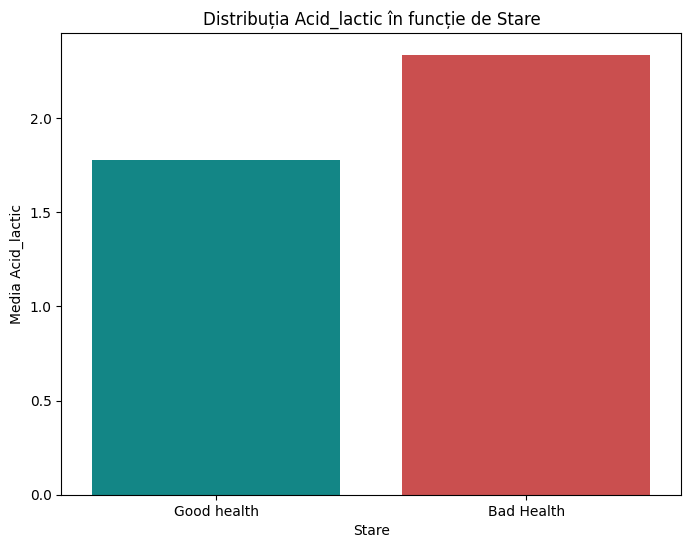

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Acid_lactic'
box_colors = ['#009999', '#de3a3a']
# Calculează media coloanei numerice în funcție de categoriile target
grouped_data = df.groupby(target_column)[numeric_column].mean().reset_index()

# Creează un grafic de bare utilizând datele grupate
plt.figure(figsize=(8, 6))
sns.barplot(x=target_column, y=numeric_column, data=grouped_data,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(f'Media {numeric_column}')

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

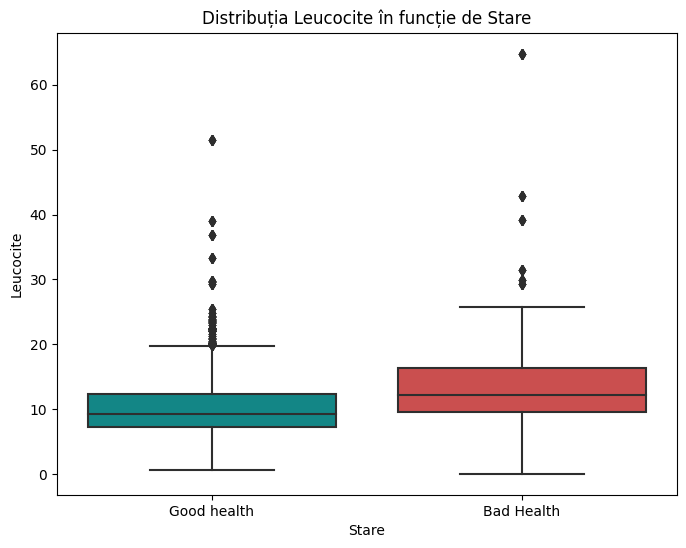

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Leucocite'

# Creează un box plot utilizând coloana numerică și coloana categorică target
plt.figure(figsize=(8, 6))
box_colors = ['#009999', '#de3a3a']

sns.boxplot(x=target_column, y=numeric_column, data=df,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(numeric_column)

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

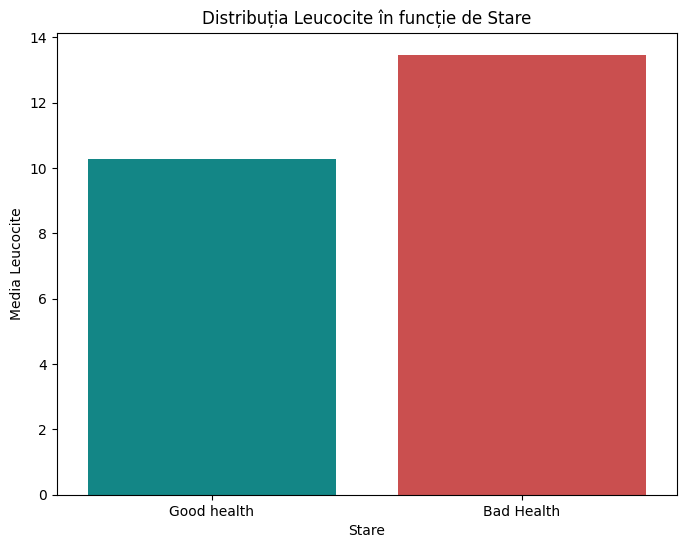

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Leucocite'
box_colors = ['#009999', '#de3a3a']
# Calculează media coloanei numerice în funcție de categoriile target
grouped_data = df.groupby(target_column)[numeric_column].mean().reset_index()

# Creează un grafic de bare utilizând datele grupate
plt.figure(figsize=(8, 6))
sns.barplot(x=target_column, y=numeric_column, data=grouped_data,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(f'Media {numeric_column}')

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

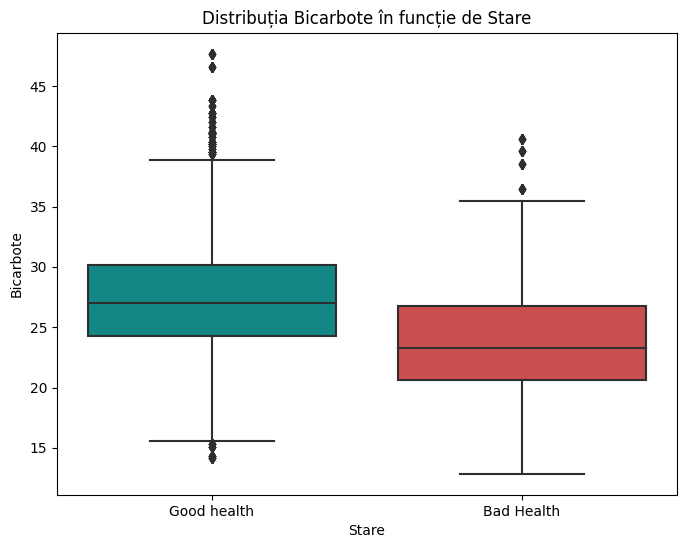

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Bicarbote'

# Creează un box plot utilizând coloana numerică și coloana categorică target
plt.figure(figsize=(8, 6))
box_colors = ['#009999', '#de3a3a']

sns.boxplot(x=target_column, y=numeric_column, data=df,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(numeric_column)

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

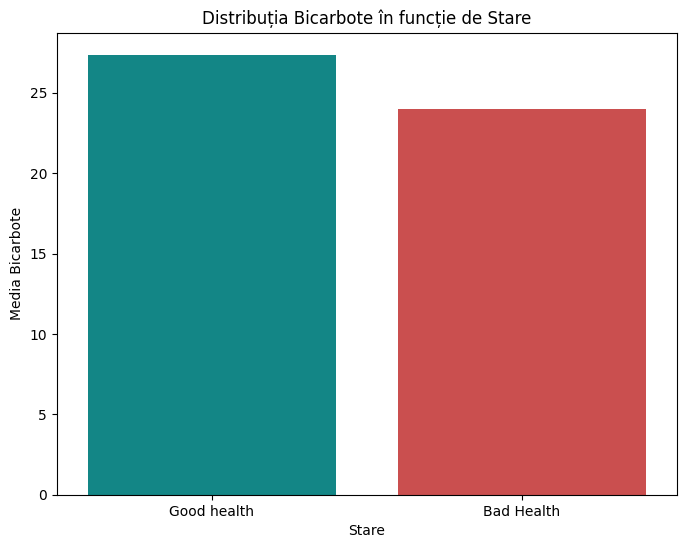

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Bicarbote'
box_colors = ['#009999', '#de3a3a']
# Calculează media coloanei numerice în funcție de categoriile target
grouped_data = df.groupby(target_column)[numeric_column].mean().reset_index()

# Creează un grafic de bare utilizând datele grupate
plt.figure(figsize=(8, 6))
sns.barplot(x=target_column, y=numeric_column, data=grouped_data,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(f'Media {numeric_column}')

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

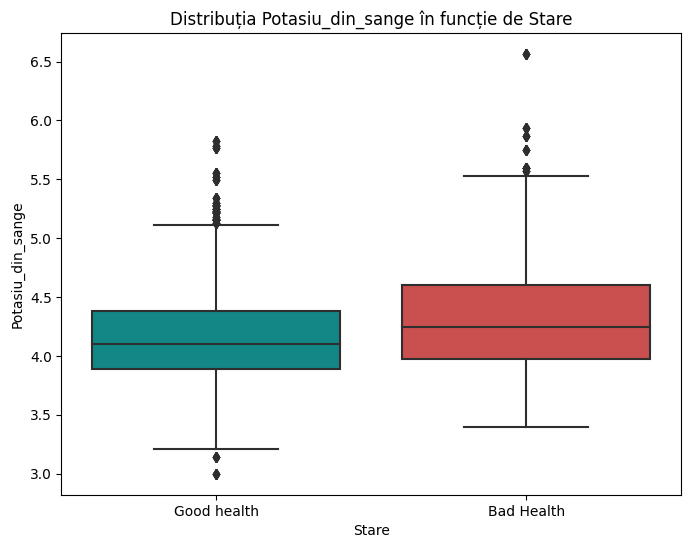

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Potasiu_din_sange'

# Creează un box plot utilizând coloana numerică și coloana categorică target
plt.figure(figsize=(8, 6))
box_colors = ['#009999', '#de3a3a']

sns.boxplot(x=target_column, y=numeric_column, data=df,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(numeric_column)

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

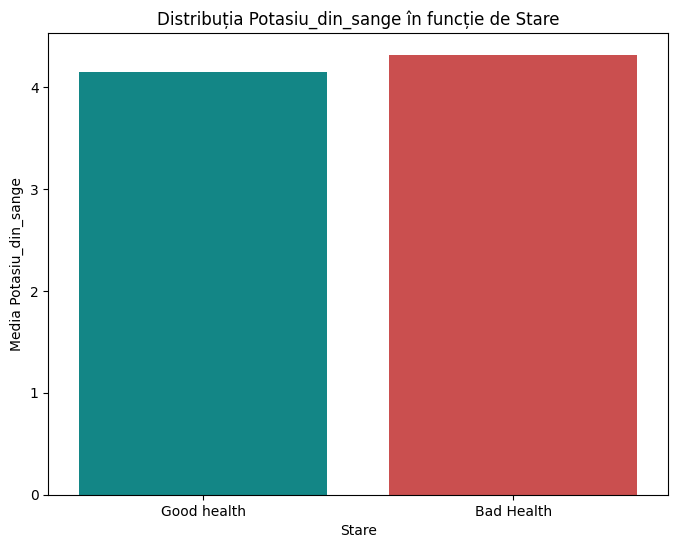

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Potasiu_din_sange'
box_colors = ['#009999', '#de3a3a']
# Calculează media coloanei numerice în funcție de categoriile target
grouped_data = df.groupby(target_column)[numeric_column].mean().reset_index()

# Creează un grafic de bare utilizând datele grupate
plt.figure(figsize=(8, 6))
sns.barplot(x=target_column, y=numeric_column, data=grouped_data,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(f'Media {numeric_column}')

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

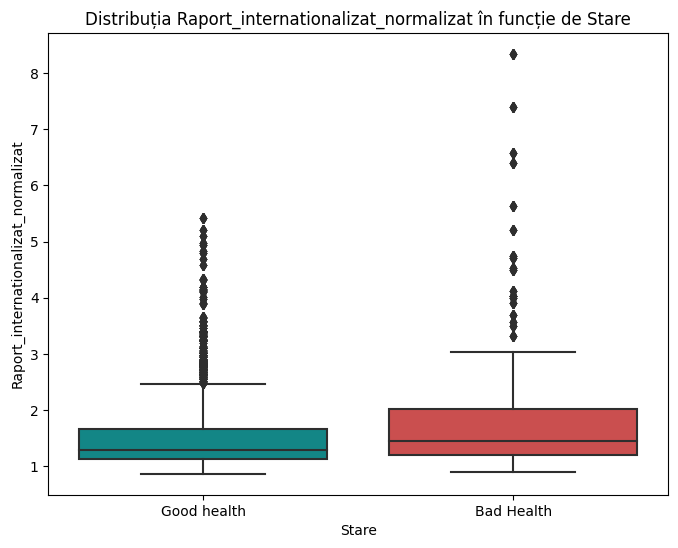

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Raport_internationalizat_normalizat'

# Creează un box plot utilizând coloana numerică și coloana categorică target
plt.figure(figsize=(8, 6))
box_colors = ['#009999', '#de3a3a']

sns.boxplot(x=target_column, y=numeric_column, data=df,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(numeric_column)

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

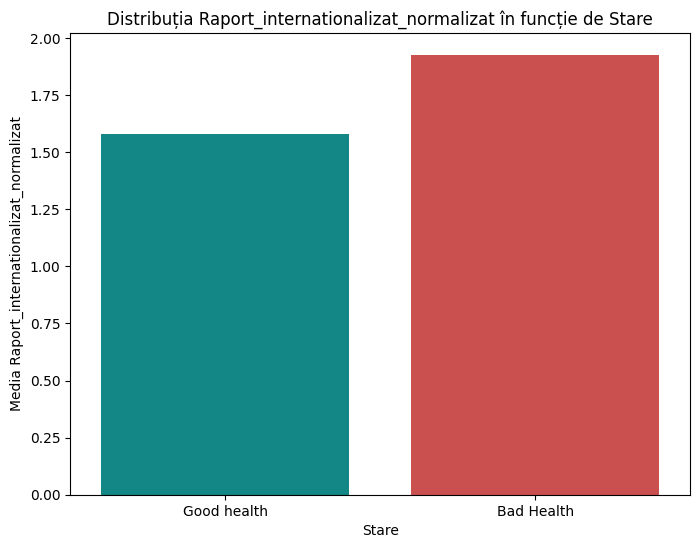

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Raport_internationalizat_normalizat'
box_colors = ['#009999', '#de3a3a']
# Calculează media coloanei numerice în funcție de categoriile target
grouped_data = df.groupby(target_column)[numeric_column].mean().reset_index()

# Creează un grafic de bare utilizând datele grupate
plt.figure(figsize=(8, 6))
sns.barplot(x=target_column, y=numeric_column, data=grouped_data,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(f'Media {numeric_column}')

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

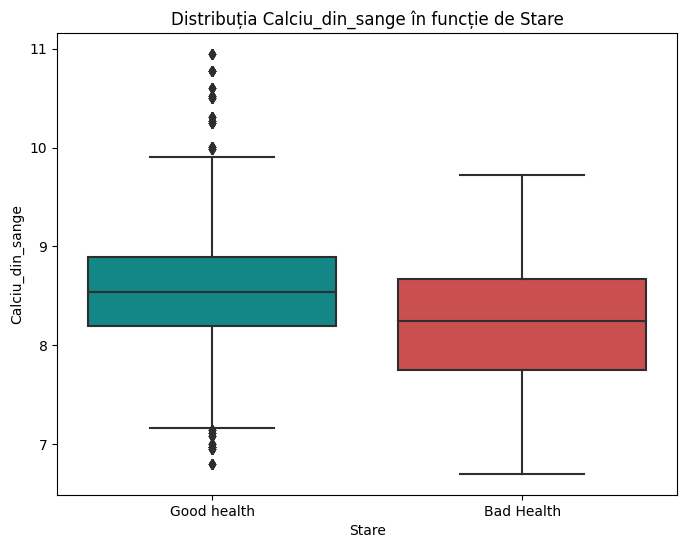

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Calciu_din_sange'

# Creează un box plot utilizând coloana numerică și coloana categorică target
plt.figure(figsize=(8, 6))
box_colors = ['#009999', '#de3a3a']

sns.boxplot(x=target_column, y=numeric_column, data=df,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(numeric_column)

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

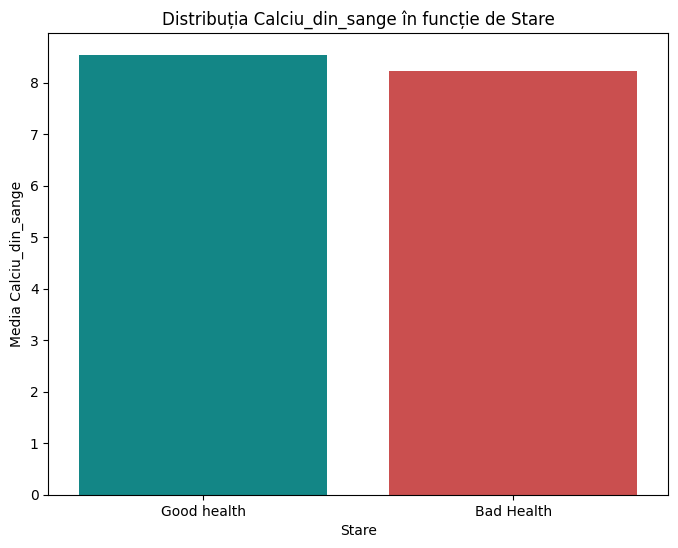

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Calciu_din_sange'
box_colors = ['#009999', '#de3a3a']
# Calculează media coloanei numerice în funcție de categoriile target
grouped_data = df.groupby(target_column)[numeric_column].mean().reset_index()

# Creează un grafic de bare utilizând datele grupate
plt.figure(figsize=(8, 6))
sns.barplot(x=target_column, y=numeric_column, data=grouped_data,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(f'Media {numeric_column}')

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

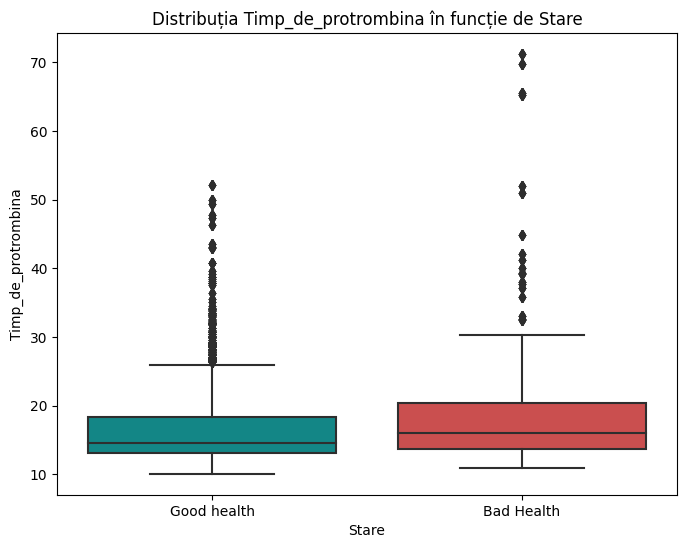

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Timp_de_protrombina'

# Creează un box plot utilizând coloana numerică și coloana categorică target
plt.figure(figsize=(8, 6))
box_colors = ['#009999', '#de3a3a']

sns.boxplot(x=target_column, y=numeric_column, data=df,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(numeric_column)

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

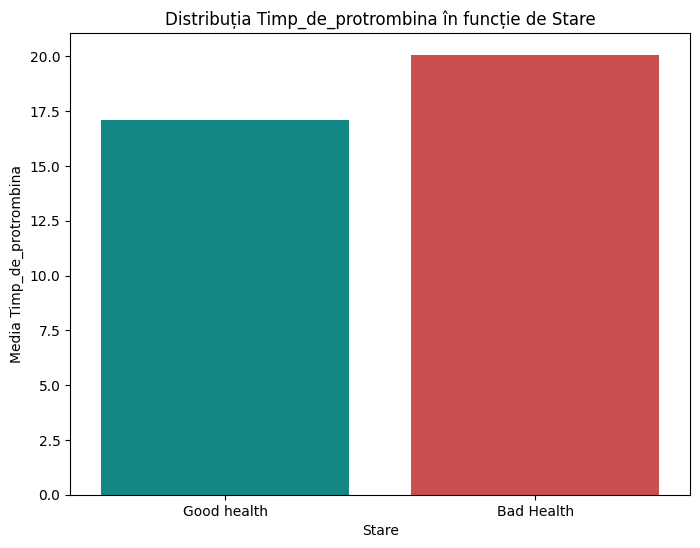

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Timp_de_protrombina'
box_colors = ['#009999', '#de3a3a']
# Calculează media coloanei numerice în funcție de categoriile target
grouped_data = df.groupby(target_column)[numeric_column].mean().reset_index()

# Creează un grafic de bare utilizând datele grupate
plt.figure(figsize=(8, 6))
sns.barplot(x=target_column, y=numeric_column, data=grouped_data,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(f'Media {numeric_column}')

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

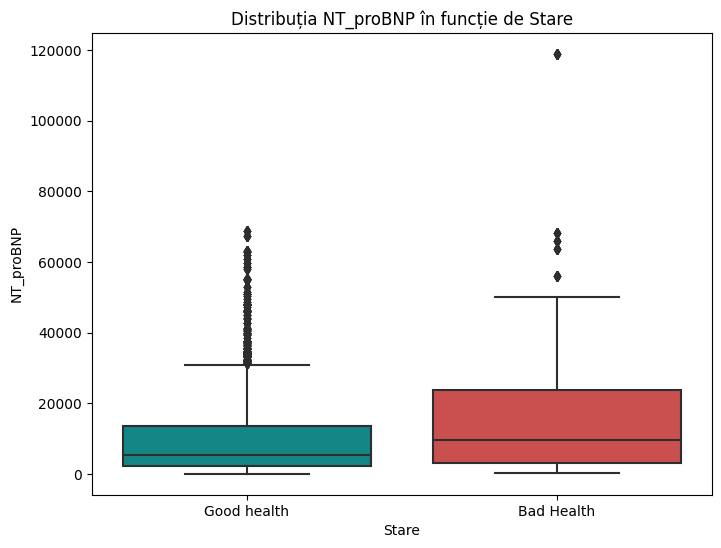

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'NT_proBNP'

# Creează un box plot utilizând coloana numerică și coloana categorică target
plt.figure(figsize=(8, 6))
box_colors = ['#009999', '#de3a3a']

sns.boxplot(x=target_column, y=numeric_column, data=df,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(numeric_column)

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

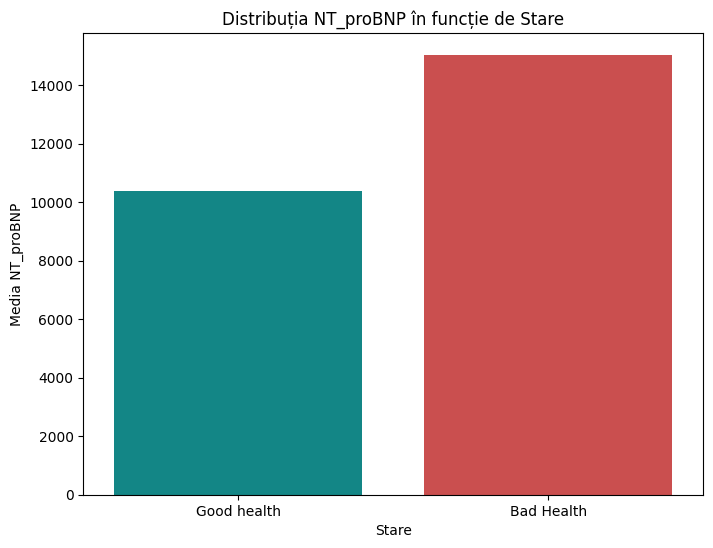

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'NT_proBNP'
box_colors = ['#009999', '#de3a3a']
# Calculează media coloanei numerice în funcție de categoriile target
grouped_data = df.groupby(target_column)[numeric_column].mean().reset_index()

# Creează un grafic de bare utilizând datele grupate
plt.figure(figsize=(8, 6))
sns.barplot(x=target_column, y=numeric_column, data=grouped_data,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(f'Media {numeric_column}')

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

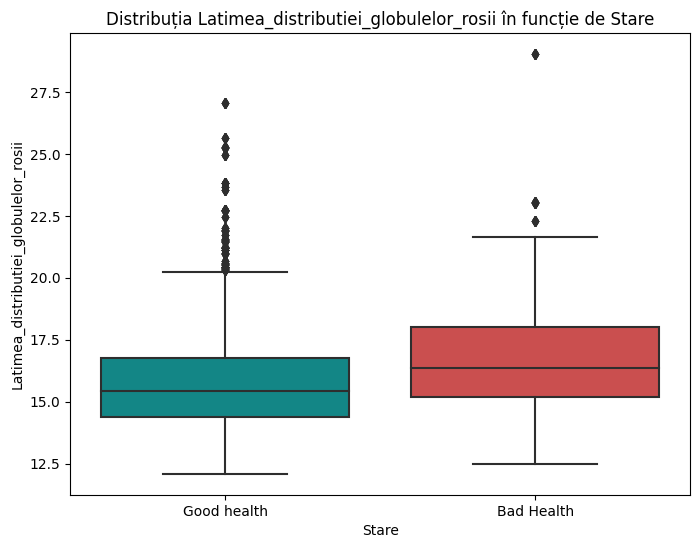

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Latimea_distributiei_globulelor_rosii'

# Creează un box plot utilizând coloana numerică și coloana categorică target
plt.figure(figsize=(8, 6))
box_colors = ['#009999', '#de3a3a']

sns.boxplot(x=target_column, y=numeric_column, data=df,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(numeric_column)

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

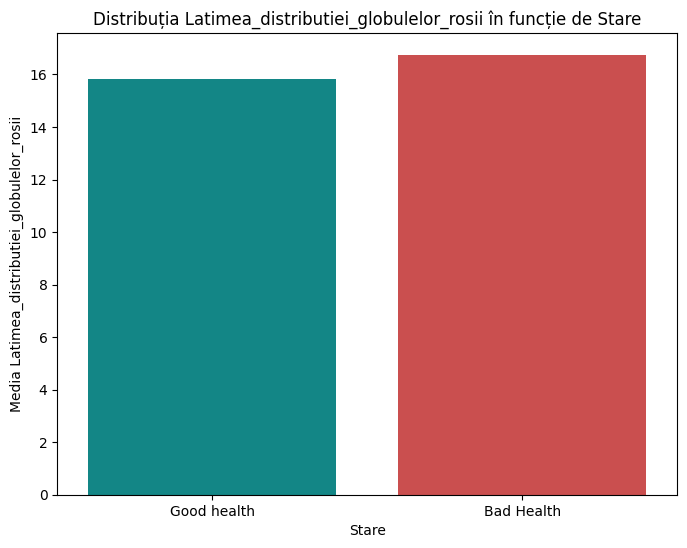

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Latimea_distributiei_globulelor_rosii'
box_colors = ['#009999', '#de3a3a']
# Calculează media coloanei numerice în funcție de categoriile target
grouped_data = df.groupby(target_column)[numeric_column].mean().reset_index()

# Creează un grafic de bare utilizând datele grupate
plt.figure(figsize=(8, 6))
sns.barplot(x=target_column, y=numeric_column, data=grouped_data,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(f'Media {numeric_column}')

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

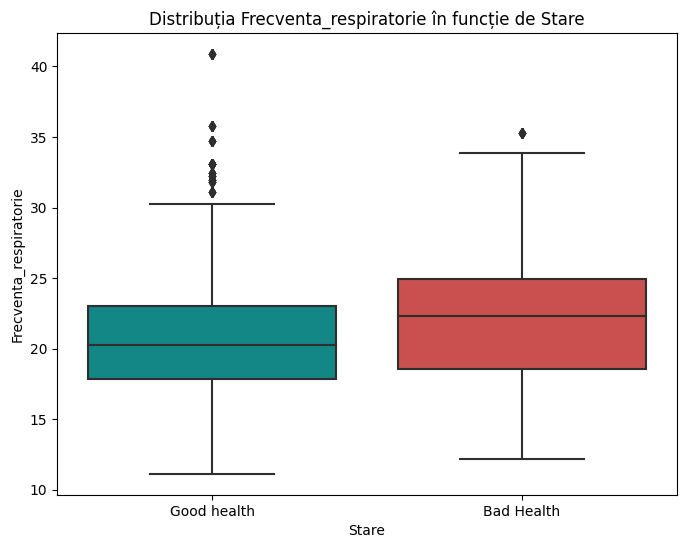

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Frecventa_respiratorie'

# Creează un box plot utilizând coloana numerică și coloana categorică target
plt.figure(figsize=(8, 6))
box_colors = ['#009999', '#de3a3a']

sns.boxplot(x=target_column, y=numeric_column, data=df,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(numeric_column)

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

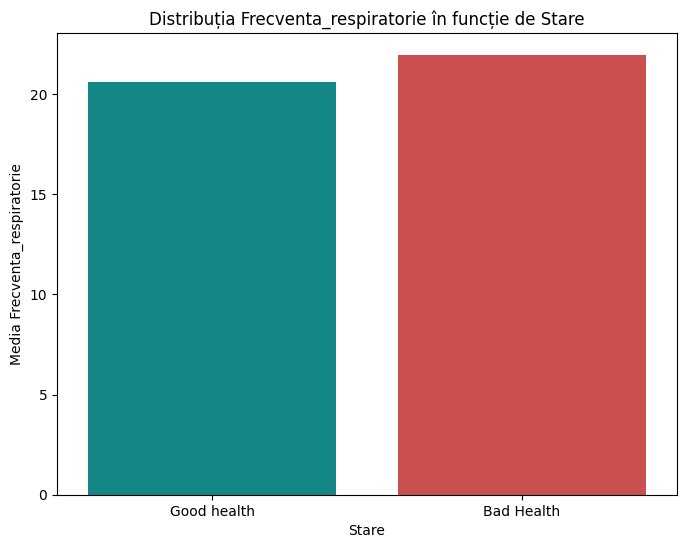

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm dataframe-ul tău
df = data_as_csv

# Definim coloana categorică target și coloana numerică
target_column = 'Stare'
numeric_column = 'Frecventa_respiratorie'
box_colors = ['#009999', '#de3a3a']
# Calculează media coloanei numerice în funcție de categoriile target
grouped_data = df.groupby(target_column)[numeric_column].mean().reset_index()

# Creează un grafic de bare utilizând datele grupate
plt.figure(figsize=(8, 6))
sns.barplot(x=target_column, y=numeric_column, data=grouped_data,palette=box_colors)
plt.title(f'Distribuția {numeric_column} în funcție de {target_column}')
plt.xlabel(target_column)
plt.ylabel(f'Media {numeric_column}')

labels = ['Good health', 'Bad Health']  # Lista cu etichetele dorite
# Modifică legenda de pe axa x
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()